In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nptdms import TdmsFile
from pathlib import Path
import math
import pathlib
import os
# importing sys
import sys
nb_path = Path.cwd()

In [14]:
pack_path = nb_path.parent / "src" #/"arenz_group_python"
print(nb_path.parent)
print(pack_path)
print(f"path existits: {pack_path.exists()}")

c:\Users\gusta\Documents\GitHub\Arenz_Group_Python
c:\Users\gusta\Documents\GitHub\Arenz_Group_Python\src
path existits: True


In [3]:
#add
sys.path.insert(0,str(pack_path))
import arenz_group_python
print(arenz_group_python.__path__)

loading arenz_group_python
['c:\\Users\\gusta\\Documents\\GitHub\\Arenz_Group_Python\\src\\arenz_group_python']
['c:\\Users\\gusta\\Documents\\GitHub\\Arenz_Group_Python\\src\\arenz_group_python']


In [13]:
import arenz_group_python.data_treatment
print(arenz_group_python.data_treatment.__path__)

['c:\\Users\\gusta\\Documents\\GitHub\\Arenz_Group_Python\\src\\arenz_group_python\\data_treatment']


In [15]:
from arenz_group_python.data_treatment.ec_data import EC_Data
from arenz_group_python import *
from arenz_group_python import EC_Data
from arenz_group_python import CV_Data
from arenz_group_python import save_key_values



In [6]:
str_path = str(pack_path)
#sys.path.append("C:/Users/gustav.wiberg/Documents/GitHub/Python/Arenz_Group_Python/src/ArenzGroupPython")
print(str_path)
sys.path.append(str_path)
#import ec_data
#ec_data.reload()
 

c:\Users\gusta\Documents\GitHub\Arenz_Group_Python\src


In [7]:
import arenz_group_python.data_treatment.util as util
print(util.extract_value_unit(" 213.43 A"))

(213.43, 'A')


[0.        0.0039996 0.0079992 ... 3.9916008 3.9956005 3.9996   ]
[0.        0.0039996 0.0079992 ... 3.9916008 3.9956005 3.9996   ]
[-0.8354656  -0.83496517 -0.8323169  ... -0.83303374 -0.83569556
 -0.83678573]
[-7.9903191e-05 -6.8596797e-05 -5.7255293e-05 ... -9.7266493e-05
 -9.6224154e-05 -8.5860178e-05]
CV_144913_ 3 : EC data sets:  2


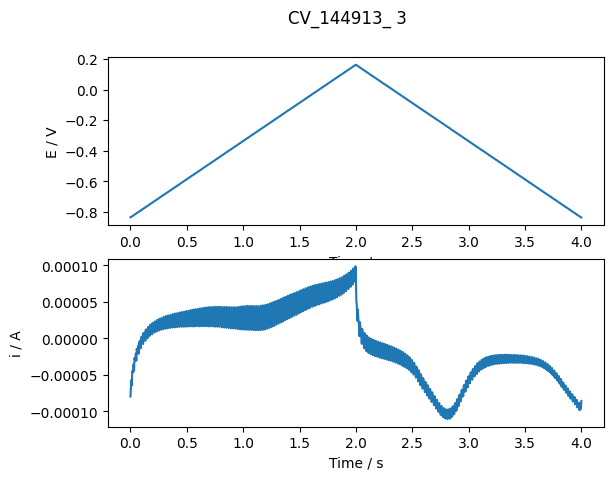

In [8]:
test_file_path = nb_path / "data" / "set1" / "CV_144913_ 3.tdms"
data = EC_Data(test_file_path)
print(data.rawdata['Time'].data)
for aa in data.rawdata:
    print(data.rawdata[aa].data)
data.plot_rawdata()



In [9]:
print( data.rawdata['E'].properties)

OrderedDict([('unit_string', 'V'), ('Quantity', 'Voltage'), ('Description', ''), ('Chname', 'E'), ('wf_start_time', np.datetime64('2024-06-19T12:49:13.423151')), ('wf_start_offset', 0.0), ('wf_increment', 0.003999599999999997), ('wf_samples', 25), ('NI_ChannelName', 'E-ai0'), ('NI_UnitDescription', 'V')])


path existits: True
lable:

dict_keys(['Current Range', 'Control Mode', 'Cell Switch', 'Start', 'Start_Delay', 'V1', 'V2', 'Rate', 'Nr of Sweeps', 'Method.Duration', 'Method.Cycle Duration', 'Method.Avg.Time', 'AC Frequency', 'AC Amplitude', 'RHE', 'Gas', 'Temp_0', 'Temp_1', 'Pressure', 'Cell Material', 'CounterElectrode', 'Ref.Electrode', 'R.solution', 'IR.compensation', 'Electrolyte1', 'Electrolyte2', 'Electrolyte3', 'Electrode.Material', 'Electrode.Tip', 'Electrode.Area', 'Electrode.ExElectrode', 'Electrode.Cat.Loading', 'Electrode.Cat.Weight', 'Electrode.Cat.totWeight', 'Electrode.Cat.w%', 'Electrode.Cat.Serial', 'Electrode.Cat.Batch', 'Electrode.Cat.Support', 'Electrode.Cat.Substrate', 'Note', 'Inst.Convection', 'Inst.Convection.Speed', 'Inst.Convection.1', 'Inst.Convection.1.Speed', 'Inst.Convection.2', 'Inst.Convection.2.Speed', 'Inst.SW0.Value', 'Inst.SW0.Driver', 'Application.Name', 'Application.Version', 'Lib.InterfacePotentiostat', 'Lib.ECi-200', 'Lib.Potentiostat_DAQ', 'DAQ

AttributeError: 'CV_Data' object has no attribute '_area'

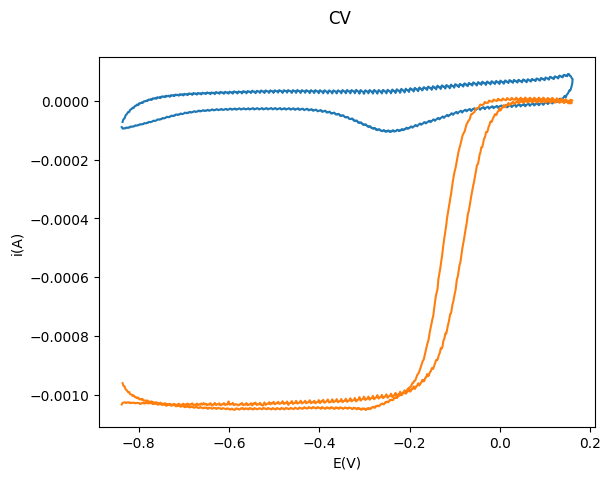

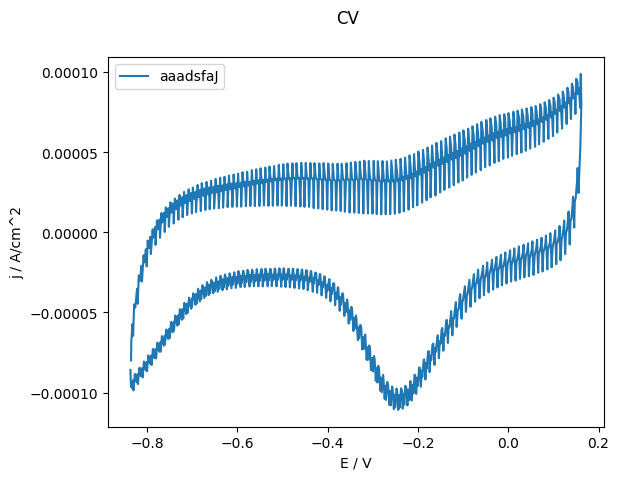

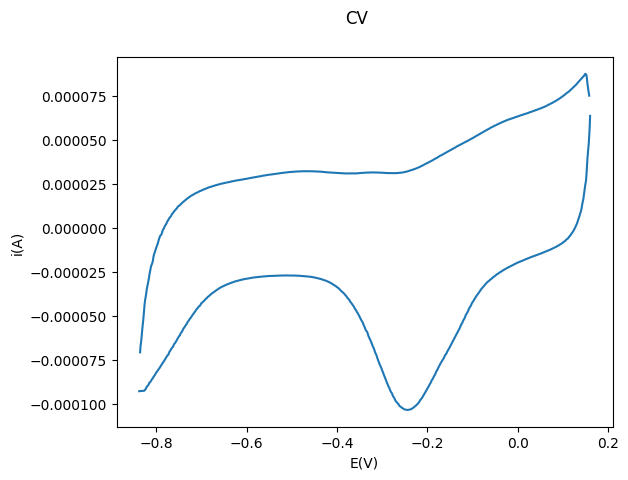

In [10]:
fig = plt.figure()
plt.suptitle("CV")
ax = fig.subplots(1)
fig = plt.figure()
plt.suptitle("CV")
ax2 = fig.subplots(1)
test_file_path = nb_path / "data" / "set1" / "CV_144913_ 3.tdms"
test_file_path2 = nb_path / "data" / "set1" / "CV_153559_ 3.tdms"
#print(test_file_path)
print(f"path existits: {test_file_path.exists()}")

ec = EC_Data(test_file_path)
ec2 = EC_Data(test_file_path2)
a,b = ec.plot("E","j",plot=ax2, legend = "aaadsfaJ")
print("lable:" + b.get_label())
print()
ax2.legend()

#ax2.legend([b],["aAAAA"])

print(ec.setup.keys())
print(util.extract_value_unit(ec.setup["Electrode.Area"]))

cv_p = CV_Data()
cv_p.convert(ec.Time, ec.E, ec.i,y_smooth=10)
cv_n = CV_Data()
cv_n.conv(ec)

cv_p2 = CV_Data()
cv_p2.convert(ec2.Time, ec2.E, ec2.i,y_smooth=10)
cv_n2 = CV_Data()
cv_n2.convert(ec2.Time, ec2.E, ec2.i,y_smooth=10)

cv_p.plot(y_smooth = 2,   dir = "all")
#cv_n.plot(y_smooth = 2, plot =ax)

cv_avg = cv_p #+ cv_n
cv_avg.add(cv_n)
cv_avg.div(2)

cv_avg.plot(y_smooth = 2, plot =ax)


cv_p2.sub(cv_p)

ec = EC_Data(test_file_path)

cv_p2.plot(y_smooth = 2, plot =ax)

cv_p2.norm("area")
cv_p2.plot(y_smooth = 2)

print(cv_p2.get_i_at_E(-0.1, "pos"), "pos")
type(cv_p2.get_i_at_E(-0.1))

In [ ]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.suptitle("Tafel Analysis")
CV_plot, Tafel_plot = fig.subplots(1,2)
CV_plot.title.set_text('CVs')

Tafel_plot.title.set_text('Tafel Plot')

paths = []
paths.append(nb_path / "data" / "set1" / "CV_144913_ 3.tdms")
paths.append( nb_path / "data" / "set1" / "CV_153559_ 3.tdms")
paths.append( nb_path / "data" / "set1" / "CV_153541_ 3.tdms")
paths.append( nb_path / "data" / "set1" / "CV_153333_ 3.tdms")
paths.append( nb_path / "data" / "set1" / "CV_151300_ 3.tdms")
paths.append( nb_path / "data" / "set1" / "CV_151725_ 3.tdms")
paths.append( nb_path / "data" / "set1" / "CV_151512_ 3.tdms")

CV_datas = [EC_Data() for i in range(len(paths))]
index=0
for path in paths:
    ec = EC_Data(path)
    cv= CV_Data()
    cv.conv(ec)
    #CV_datas.append(cv)
    CV_datas[index]=cv
    index=index+1 
print(index)

rot=[]
y = []
E = []
Epot=-0.5
y_axis_title =""
for cv in CV_datas:
    rot.append(math.sqrt(cv._rotation))
   
    cv.norm("area")
    cv.plot(plot = CV_plot, legend = cv._rotation)
    y.append(cv.get_i_at_E(Epot))
    E.append([Epot, Epot])
    y_axis_title= cv.i_label
    #print(cv.setup)
#print(rot)
rot = np.array(rot)
y = np.array(y)
CV_plot.plot(E,y, "o")
CV_plot.legend()
print(rot)
print(y[:,0])

Tafel_plot.plot(rot,y,'o')

Tafel_plot.set_xlabel("rotation$^{0.5}$")
Tafel_plot.set_ylabel(y_axis_title)
m, b = np.polyfit(rot, y[:,0], 1)
y_pos= m*rot+b
line,=Tafel_plot.plot(rot,y_pos,'-' )
line.set_label(f"pos: m={m:3.3e}")
m, b = np.polyfit(rot, y[:,1], 1)
y_neg= m*rot+b
line,=Tafel_plot.plot(rot,y_neg,'-' )
line.set_label(f"neg: m={m:3.3e}")
Tafel_plot.legend()


In [ ]:
#data import from tdms-file:

test_file_path = nb_path 
#data in the folder, e.g.
tdms_file = TdmsFile.read("data/Steps_102346.tdms")
tdms_file_groups = tdms_file.groups()
tdms_file_df = tdms_file.as_dataframe()

di = tdms_file.properties
print(di)
print("File")
print(tdms_file.properties['name'])
print("proper")
for key, value in di.items():
    print(key, value)
#for key, value in tdms_file.properties().items():
#    print(key, value)


# grab the columns in the file
tdms_file_groupEC_i_file0s50mV = tdms_file_groups[0]['i']
tdms_file_groupEC_t_file0s50mV = tdms_file_groups[0]['Time']
tdms_file_groupEC_E_file0s50mV = tdms_file_groups[0]['E']
tdms_file_groupEC_R_file0s50mV = tdms_file_groups[0]['Z_E']

# rename and create a numpy-array with the data
current_file0s50mV = tdms_file_groupEC_i_file0s50mV.data
time_file0s50mV = tdms_file_groupEC_t_file0s50mV.data
potential_file0s50mV = tdms_file_groupEC_E_file0s50mV.data
resistivity_file0s50mV = tdms_file_groupEC_R_file0s50mV.data

#check if it worked, e.g.:
print(current_file0s50mV)


# function
def displayText(path_to_TDMS_EC_data):
    print( "Geeks 4 Geeks !")

In [ ]:
test_file_path = pathlib.PureWindowsPath('c:\temp\Steps_134427.tdms')
#print(test_file_path)pathlib.PureWindowsPath
#print(f"path existits: {test_file_path.exists()}")

test_dataSet = EC_Data("c:/temp/Steps_134427.tdms")
test_dataSet.plot("Time","R_E")
test_dataSet.plot("Time","Z_E")
test_dataSet.plot("Time","j")

test_dataSet.plot("Time","E")
test_dataSet.plot("Time","E-IR")
test_dataSet.plot("Time","E-IZ")

In [ ]:

test_dataSet.plot("Time","E")
test_dataSet.plot("Time","E-IR")
test_dataSet.plot("Time","E-IZ")

In [ ]:
np.savetxt('data.csv', [test_dataSet.Time, test_dataSet.E, test_dataSet.i,test_dataSet.Z_E], delimiter=';', header="Time;E;i;Z_E;",fmt=["%2.4f"," %2.3f"," %1.4e", "%1.4e"])

In [ ]:
E_iz,a,b=test_dataSet.get_channel("E-IZ")
E_ir,a,b=test_dataSet.get_channel("E-IZ")
print(f"Phase_E: {len(test_dataSet.Phase_E)}")
E_iz,a,b=test_dataSet.get_channel("E-IZ")
print(f"E-IZ: {len(E_iz)}")
print(f"E-IZ: {len(E_ir)}")
data_arr= [test_dataSet.Time, test_dataSet.E, test_dataSet.i,test_dataSet.Z_E,test_dataSet.Phase_E ,E_iz, E_ir]

maxIndex = math.floor(len(E_ir) / 10)
print(f"maxindex: {maxIndex}")
data_r = np.ndarray(shape=(maxIndex), dtype=float, order='F')
data_red =[data_r, data_r, data_r, data_r, data_r, data_r]
print(data_red)
print(data_arr)

data_i = np.ndarray(shape=(maxIndex), dtype=np.dtype(np.int64), order='F')
r_Time = np.ndarray(shape=(maxIndex), dtype=float, order='F')
r_E = np.ndarray(shape=(maxIndex), dtype=float, order='F')
r_i = np.ndarray(shape=(maxIndex), dtype=float, order='F')
r_Z = np.ndarray(shape=(maxIndex), dtype=float, order='F')
r_p = np.ndarray(shape=(maxIndex), dtype=float, order='F')
r_Eiz = np.ndarray(shape=(maxIndex), dtype=float, order='F')
r_Eir = np.ndarray(shape=(maxIndex), dtype=float, order='F')
for x in range(maxIndex):
    r_Time[x] = test_dataSet.Time[x*10]
    r_E[x] = test_dataSet.E[x*10]
    r_i[x] = test_dataSet.i[x*10]
    r_Z[x] = test_dataSet.Z_E[x*10]
    r_p[x] = test_dataSet.Phase_E[x*10]
    r_Eiz[x] = E_iz[x*10]
    r_Eir[x] = E_ir[x*10]

print("time")
print(r_Time[range(5)])
data_red = np.ndarray(shape=(6, maxIndex), dtype=float, order='F')
data_red2 =[r_Time, r_E, r_i, r_Z,r_p, r_Eiz, r_Eir]
data_red[0]=r_Time
data_red[1]=r_E
data_red[2]=r_i
data_red[3]=r_Z
data_red[4]=r_p
print("time")
print(data_red)

data_red_t = np.transpose(data_red2)

print(data_red_t)

 

In [ ]:


FormatOfwrite = ["%2.2f"," %2.3f"," %1.4e", "%1.4e", "%1.4e", "%1.4e","%1.4e"]
#print(data_arr.dim())

data_arr_t = np.transpose(data_red)
np.savetxt(str(f'{test_dataSet.name}.csv'), data_red_t, delimiter=';\t', header="Time;\tE;\ti;Z_E;\tPhase_E;\tE-i*Z; \tE-i*R", fmt=FormatOfwrite)

test_file_path = pathlib.PureWindowsPath('c:\temp\Steps_134427.tdms')
#print(test_file_path)pathlib.PureWindowsPath
#print(f"path existits: {test_file_path.exists()}")

test_dataSet = EC_Data("c:/temp/Steps_134427.tdms")
test_dataSet.plot("E","t")